In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt


In [1]:
import yfinance as yf
from datetime import datetime

# Set the date range
start = '2012-01-01'
end = '2024-01-01'

# Use yfinance to download data (more reliable than pandas_datareader)
df = yf.download('AAPL',  start=start, end=end )


df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,


In [28]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,


In [9]:
df.info

<bound method DataFrame.info of Empty DataFrame
Columns: [(Adj Close, AAPL), (Close, AAPL), (High, AAPL), (Low, AAPL), (Open, AAPL), (Volume, AAPL)]
Index: []>

In [10]:
df = df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


In [11]:
df = df.drop(['Date'], axis = 1)



C:\Users\nishu\AppData\Local\Temp\ipykernel_19632\2009568241.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


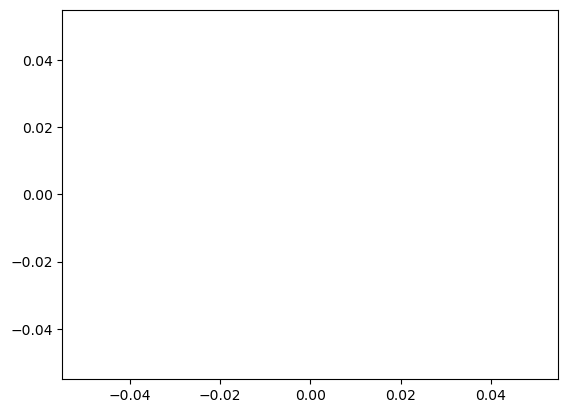

In [12]:
plt.plot(df.High)

In [13]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


In [14]:
ma100 = df.High.rolling(100).mean()
ma100

Ticker,AAPL


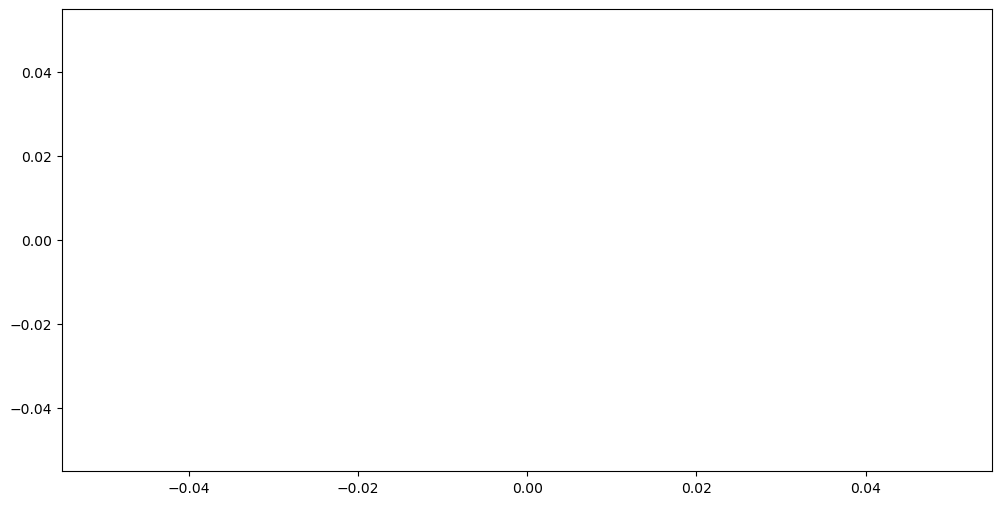

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.High)
plt.plot(ma100 , 'r')

In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL


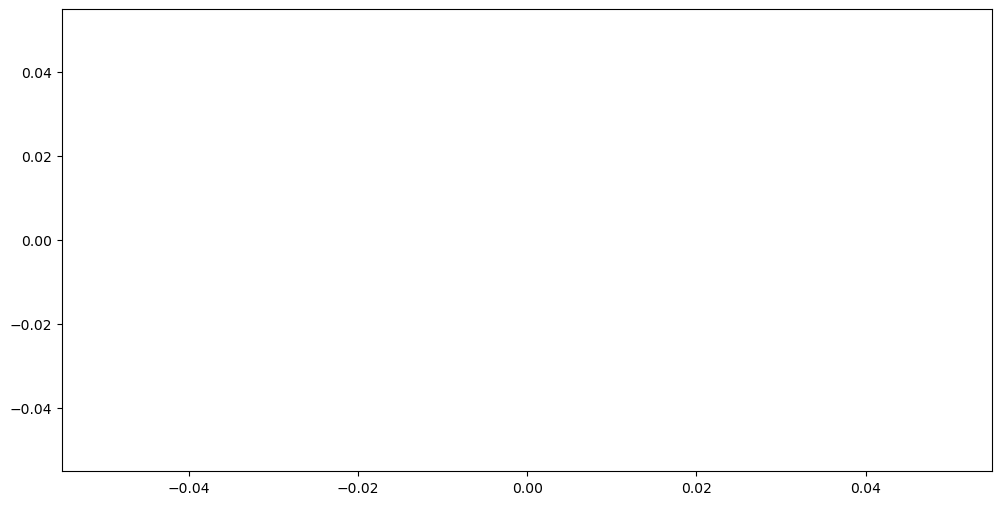

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.High)
plt.plot(ma100 , 'r')
plt.plot(ma200, 'g')

In [18]:
df.shape

(0, 6)

In [19]:
#spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(0, 1)
(0, 1)


In [20]:
data_training.head()

Ticker,AAPL


In [21]:
data_testing.head()

Ticker,AAPL


In [22]:
from sklearn.preprocessing  import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
data_training.shape

(0, 1)

In [24]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
data_training_array.shape

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
# Fixed indentation - removed extra spaces before x_train
x_train , y_train = np.array(x_train), np.array(y_train)
    

NameError: name 'data_training_array' is not defined

In [ ]:
x_train.shape

In [ ]:
#ml model
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential


In [ ]:
from tensorflow.keras.layers import Input

# Modern approach
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(units=50, activation='relu', return_sequences=True),
    Dropout(0.2),

    #Input(shape=(x_train.shape[1], 1)),
    LSTM(units=60, activation='relu', return_sequences=True),
    Dropout(0.3),

    #Input(shape=(x_train.shape[1], 1)),
    LSTM(units=80, activation='relu', return_sequences=True),
    Dropout(0.4),

    #Input(shape=(x_train.shape[1], 1)),
    LSTM(units=120, activation='relu'),
    Dropout(0.5),
    
])

model.add(Dense(units = 1))

NameError: name 'Sequential' is not defined

In [ ]:
model.summary()

In [ ]:
model.save('stock_model.keras')

In [ ]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 5)

In [ ]:
model.save('stock_model.keras')

In [ ]:
data_testing.head()

In [ ]:
data_training.tail(100)

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:


# Assuming past_100_days and data_testing are pandas DataFrames
final_df = pd.concat([past_100_days, x], ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
    

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# making predictions
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.00701864
y_predicted = y_predicted* scale_factor
y_test = y_test * scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'original price')
plt.plot(y_predicted, 'r' , label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()